In [5]:
import requests
import json
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

In [6]:
base_url = 'https://www.guidestar.org.il/services/apexrest/api'
login_info = {
    'username': 'Avia.2.4.6@gmail.com',
    'password': 'Acavish217!'
}

res = requests.post(base_url + '/login', json = login_info)

In [7]:
session_id = res.json()['sessionId']

In [8]:
session_id

'00D24000000p4lu!ARsAQKrEPUh0r2gilhqENc2lYQzNcxzf1AFYOGgkhJFQidHON1_vPOfbZ0arvz_BocYNyRXU5J.dX6t7EB7mE6sGLBpy.ibr'

In [9]:
headers = {"Authorization": "Bearer " + session_id, 'fullObject': 'true'}


In [10]:
# Get organization data
association_response = requests.get(base_url + '/organizations', headers=headers)
data_as = association_response.json()

if data_as:
    # Initialize a dictionary to store organization data
    organizations_data = {}

    # Loop through each organization
    for organization in data_as:
        reg_num = organization.get('regNum')
        if reg_num:
            # Get the full organization data using registration number
            organization_url = f"{base_url}/organizations/{reg_num}"
            full_organization_response = requests.get(organization_url, headers=headers)
            full_organization_data = full_organization_response.json()
            
            organizations_data[reg_num] = full_organization_data

            # Save all fields obtained from the full organization model for this association
            organizations_data[reg_num] = full_organization_data
        else:
            print("Registration number not found for an organization.")
    # Save the data in JSON format with all fields
    with open('organizations_data_full.json', 'w') as f:
        json.dump(organizations_data, f)
    print("Full organization data saved in JSON format.")
else:
    print("No data received or empty response.")
     
    

Full organization data saved in JSON format.


In [11]:
# Calculate the number of associations
num_associations = len(organizations_data)
print("Total number of associations:", num_associations)



Total number of associations: 200


In [12]:
# Extract relevant fields for each organization
relevant_fields_data = {}
for reg_num, org_data in organizations_data.items():
    relevant_fields = {
        'regNum': reg_num,
        'Name': org_data.get('name', ''),
        'orgGoal': org_data.get('orgGoal', ''),
        'urlGuidestar': org_data.get('urlGuidestar', ''),
        'activityAreas': org_data.get('activityAreas', ''),
        'addressCity': org_data.get('addressCity', ''),
        'email': org_data.get('email', '')
    }
    relevant_fields_data[reg_num] = relevant_fields

# Convert relevant fields data into DataFrame
df = pd.DataFrame.from_dict(relevant_fields_data, orient='index')

# Display the DataFrame
print(df)

              regNum                                               Name  \
580430767  580430767                 " בצוותא " חונכים דרך להצלחה (ע"ר)   
589105964  589105964                                      " נוה עציון "   
580236214  580236214      ""אורח חיים" באר שבע ע"ש רבי חיים בן עטר זצ"ל   
580448942  580448942  "'קשר" - התחזקות בין הקהילות דוברי צרפתית - יר...   
580244747  580244747                     "א-קפלה - אנסמבל קולי ירושלים"   
...              ...                                                ...   
580643211  580643211                 "היכל הגוונים המשתנים" אלעד (ע''ר)   
580196715  580196715             "היכל יואב" בית כנסת מושב לבנים  (ע"ר)   
580072205  580072205  "היכל מרדכי" ע"ש המקובל הצדיק הרה"ג ר' מרדכי ש...   
580072288  580072288  "היכל שם" על שם הרבנים שלמה ומרדכי מאיר פרידמן...   
580105922  580105922                                  "הכומתות הירוקות"   

                                                     orgGoal  \
580430767  הקמת ארגון חסד. עזרה לאל

In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 580430767 to 580105922
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   regNum         200 non-null    object
 1   Name           200 non-null    object
 2   orgGoal        200 non-null    object
 3   urlGuidestar   200 non-null    object
 4   activityAreas  198 non-null    object
 5   addressCity    198 non-null    object
 6   email          144 non-null    object
dtypes: object(7)
memory usage: 12.5+ KB


In [14]:
#ניתוח הנתונים שלי והבנת ההתפלגויות והקשרים וטיפול בנתונים בהתאם 
#נתחיל בערכים חסרים

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)






Missing values per column:
regNum            0
Name              0
orgGoal           0
urlGuidestar      0
activityAreas     2
addressCity       2
email            56
dtype: int64


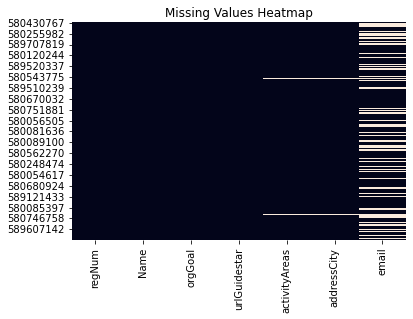

In [15]:
#נבדוק את סוג הערכים החסרים 
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [16]:
# Define the constant value for imputation
constant_value = "Not Available"

# Replace missing values in the 'email' columns with the constant value
df['email'].fillna(constant_value, inplace=True)



In [17]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
regNum           0
Name             0
orgGoal          0
urlGuidestar     0
activityAreas    2
addressCity      2
email            0
dtype: int64


In [18]:
#לפני האנקודד נבדוק באיזה שורות יכולות להיות בעיות כי מופיעים בהם ערכים שהם רשימות
problematic_activity_areas = df[df['activityAreas'].apply(lambda x: isinstance(x, list))]
print("Records with lists in 'activityAreas':")
print(problematic_activity_areas[['activityAreas']])

Records with lists in 'activityAreas':
             activityAreas
580430767        [תל אביב]
589105964        [ירושלים]
580236214          [הדרום]
580448942        [ירושלים]
580244747  [ירושלים, ארצי]
...                    ...
580643211    [המרכז, מרכז]
580196715          [הצפון]
580072205        [ירושלים]
580072288        [תל אביב]
580105922     [חיפה, ארצי]

[198 rows x 1 columns]


In [19]:
#we create helper function that checks whether an element is a list
def is_list(x):
    return isinstance(x, list)

In [20]:
# Checking 'activityAreas' column for lists
problematic_activity_areas = df[df['activityAreas'].apply(is_list)]

# Checking 'addressCity' column for lists
problematic_address_city = df[df['addressCity'].apply(is_list)]

# Print problematic records for 'activityAreas'
if not problematic_activity_areas.empty:
    print("Problematic records in 'activityAreas':")
    print(problematic_activity_areas[['activityAreas']])
else:
    print("No problematic records found in 'activityAreas'.")

# Print problematic records for 'addressCity'
if not problematic_address_city.empty:
    print("Problematic records in 'addressCity':")
    print(problematic_address_city[['addressCity']])
else:
    print("No problematic records found in 'addressCity'.")

Problematic records in 'activityAreas':
             activityAreas
580430767        [תל אביב]
589105964        [ירושלים]
580236214          [הדרום]
580448942        [ירושלים]
580244747  [ירושלים, ארצי]
...                    ...
580643211    [המרכז, מרכז]
580196715          [הצפון]
580072205        [ירושלים]
580072288        [תל אביב]
580105922     [חיפה, ארצי]

[198 rows x 1 columns]
No problematic records found in 'addressCity'.


In [21]:
#converting each list in the activityAreas column into a string
df['activityAreas'] = df['activityAreas'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [22]:
print(df.head())

              regNum                                               Name  \
580430767  580430767                 " בצוותא " חונכים דרך להצלחה (ע"ר)   
589105964  589105964                                      " נוה עציון "   
580236214  580236214      ""אורח חיים" באר שבע ע"ש רבי חיים בן עטר זצ"ל   
580448942  580448942  "'קשר" - התחזקות בין הקהילות דוברי צרפתית - יר...   
580244747  580244747                     "א-קפלה - אנסמבל קולי ירושלים"   

                                                     orgGoal  \
580430767  הקמת ארגון חסד. עזרה לאלמנות וליתומים.גמילות ח...   
589105964  הקמת בנין לבית הספר הממלכתי דתי "נוה עציון" בש...   
580236214  להקים מרכז קהילתי ובית כנסת. ארגון ארועים \nחב...   
580448942  הפצת תורה: הרצאות, סמינרים, שבתות, קירוב אנשים...   
580244747       לנהל מקהלה ולהגדיל פעילותה התרבותית בירושלים   

                                                urlGuidestar  activityAreas  \
580430767  https://www.guidestar.org.il/organization/5804...        תל אביב   
589105

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

import nltk
nltk.download('punkt')  #צריך להוריד את ה NLTK's punkt tokenizer  


print(nltk.data.path)




['/Users/noam/nltk_data', '/Users/noam/opt/anaconda3/nltk_data', '/Users/noam/opt/anaconda3/share/nltk_data', '/Users/noam/opt/anaconda3/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to /Users/noam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:

import nltk

# Add the path to your NLTK data directory
nltk.data.path.append('C:\\Users\\אביה חדאד\\AppData\\Roaming\\nltk_data')

# Download the stopwords corpus
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /Users/noam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Step 1: Text Preprocessing

# Remove punctuation
df['name_processed'] = df['Name'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['orgGoal_processed'] = df['orgGoal'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Convert text to lowercase
df['name_processed'] = df['name_processed'].str.lower()
df['orgGoal_processed'] = df['orgGoal_processed'].str.lower()

# Tokenize text
df['name_processed'] = df['name_processed'].apply(word_tokenize)
df['orgGoal_processed'] = df['orgGoal_processed'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['name_processed'] = df['name_processed'].apply(lambda x: [word for word in x if word not in stop_words])
df['orgGoal_processed'] = df['orgGoal_processed'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['name_processed'] = df['name_processed'].apply(lambda x: [stemmer.stem(word) for word in x])
df['orgGoal_processed'] = df['orgGoal_processed'].apply(lambda x: [stemmer.stem(word) for word in x])

# Step 2: Feature Extraction (TF-IDF Vectorization)

# Convert processed text into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
name_tfidf_matrix = tfidf_vectorizer.fit_transform(df['name_processed'].apply(lambda x: ' '.join(x)))
orgGoal_tfidf_matrix = tfidf_vectorizer.fit_transform(df['orgGoal_processed'].apply(lambda x: ' '.join(x)))

print(len(tfidf_vectorizer.get_feature_names()))



2920


/Users/noam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
name_tfidf_df = pd.DataFrame(name_tfidf_matrix.toarray())
orgGoal_tfidf_df = pd.DataFrame(orgGoal_tfidf_matrix.toarray())


In [27]:
print("Columns of name_tfidf_df:")
print(name_tfidf_df.columns)

print("\nColumns of orgGoal_tfidf_df:")
print(orgGoal_tfidf_df.columns)

print("\nFirst few rows of name_tfidf_df:")
print(name_tfidf_df.head())

print("\nFirst few rows of orgGoal_tfidf_df:")
print(orgGoal_tfidf_df.head())



Columns of name_tfidf_df:
RangeIndex(start=0, stop=729, step=1)

Columns of orgGoal_tfidf_df:
RangeIndex(start=0, stop=2920, step=1)

First few rows of name_tfidf_df:
   0    1    2    3    4    5    6    7    8    9    ...  719  720  721  722  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   723  724  725  726  727  728  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 729 columns]

First few rows of orgGoal_tfidf_df:
   0     1     2     3     4     5     6     7     8     9     ...  2910  \
0   0.0   0

In [28]:
print("Shape of name_tfidf_df:", name_tfidf_df.shape)
print("Shape of orgGoal_tfidf_df:", orgGoal_tfidf_df.shape)


Shape of name_tfidf_df: (200, 729)
Shape of orgGoal_tfidf_df: (200, 2920)


In [29]:
print(df.columns)


Index(['regNum', 'Name', 'orgGoal', 'urlGuidestar', 'activityAreas',
       'addressCity', 'email', 'name_processed', 'orgGoal_processed'],
      dtype='object')


In [30]:
# Flatten the lists in the "name_processed" column
unique_names = pd.Series([item for sublist in df['name_processed'] for item in sublist]).unique()
print("Unique names:", unique_names)

# Flatten the lists in the "orgGoal_processed" column
unique_org_goals = pd.Series([item for sublist in df['orgGoal_processed'] for item in sublist]).unique()
print("Unique org goals:", unique_org_goals)



Unique names: ['בצוותא' 'חונכים' 'דרך' 'להצלחה' 'ער' 'נוה' 'עציון' 'אורח' 'חיים' 'באר'
 'שבע' 'עש' 'רבי' 'בן' 'עטר' 'זצל' 'קשר' 'התחזקות' 'בין' 'הקהילות' 'דוברי'
 'צרפתית' 'ירושלים' 'אקפלה' 'אנסמבל' 'קולי' 'אב' 'חדשות' 'השומרונים' 'דו'
 'שבועוןהעתון' 'השומרוני' 'הראשון' 'אבות' 'ובנים' 'שכונת' 'חבצלת' 'רחובות'
 'אביב' 'אגודת' 'בוגרים' 'וידידים' 'של' 'כפר' 'הנוער' 'שמן' 'אבני' 'זכרון'
 'עמותה' 'בקבוץ' 'הגושרים' 'ציון' 'שימור' 'שיחזור' 'והצלה' 'מהרס' 'בתים'
 'עתיקים' 'אגדן' 'אירגון' 'גימלאי' 'דן' 'אגודה' 'לקידום' 'שרותי' 'יעוץ'
 'ומידע' 'ניידים' 'לאזרח' 'באזורים' 'כפריים' 'אביר' 'יעקב' 'אשדוד' 'בית'
 'כנסת' 'חיי' 'אדם' 'הגבעה' 'רווחה' 'החסד' 'אשקלון' 'יהודי' 'אתיופיה'
 'מרפאת' 'לין' 'קרן' 'חינוך' 'בגליל' 'המערביכרמיאלמעלות' 'ומושבי'
 'מעלהיוסף' 'אהבה' 'ואחוה' 'ספרדי' 'בשכונה' 'הדרומית' 'בכרמיאל' 'אהבת'
 'אליהו' 'אלי' 'כהן' 'זל' 'ישראל' 'האדמור' 'אבוחצירא' 'זצוקל' 'אהל'
 'אברהם' 'שעי' 'סמינר' 'בני' 'ברק' 'בתשבע' 'מרכז' 'לתורה' 'וחסד' 'עלשם'
 'האשה' 'בר' 'אליעזר' 'הכהן' 'דב' 'הרהח' 'ר' 'סוכ

In [31]:
print("Unique values in 'activityAreas' column:", df['activityAreas'].unique())


Unique values in 'activityAreas' column: ['תל אביב' 'ירושלים' 'הדרום' 'ירושלים, ארצי' 'תל אביב, ארצי' 'המרכז'
 'המרכז, ארצי' 'הצפון' 'תל אביב, מרכז' 'הדרום, דרום' 'חיפה' 'הצפון, צפון'
 'ירושלים, תל אביב, אזור יהודה ושומרון' 'המרכז, מרכז' 'ירושלים, מרכז'
 'המרכז, ירושלים' 'הדרום, ארצי, דרום' 'אזור יהודה ושומרון, ירושלים' None
 'חיפה, צפון' 'אזור יהודה ושומרון, ארצי' 'הצפון, ארצי' 'חיפה, ארצי'
 'אזור יהודה ושומרון' 'צפון' 'הצפון, חיפה' 'הדרום, תל אביב'
 'לא מוגדר, דרום' 'ירושלים, דרום, צפון, מרכז' 'ירושלים, הדרום']


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Step 1: Text Preprocessing
# Handle None values in 'activityAreas' column
df['activityAreas'] = df['activityAreas'].fillna('')
df['addressCity'] = df['addressCity'].fillna('')

# Tokenization, lowercasing, stopword removal, and stemming for activityAreas column
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
df['activityAreas_processed'] = df['activityAreas'].apply(
     lambda x: ' '.join([stemmer.stem(word.lower()) for word in word_tokenize(x) if word.lower() not in stop_words])
)

# Tokenization, lowercasing, stopword removal, and stemming for addressCity column
df['addressCity_processed'] = df['addressCity'].apply(
     lambda x: ' '.join([stemmer.stem(word.lower()) for word in word_tokenize(x) if word.lower() not in stop_words])
)








In [33]:
# Step 2: Feature Extraction (TF-IDF Vectorization)
# Convert processed text into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
activityAreas_tfidf_matrix = tfidf_vectorizer.fit_transform(df['activityAreas_processed'])
addressCity_tfidf_matrix = tfidf_vectorizer.fit_transform(df['addressCity_processed'])

In [34]:
# Step 3: Extract unique features
activityAreas_feature_names = tfidf_vectorizer.get_feature_names()
addressCity_feature_names = tfidf_vectorizer.get_feature_names()

/Users/noam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
# Print the number of features for each column
print("Number of features for activityAreas:", len(activityAreas_feature_names))
print("Number of features for addressCity:", len(addressCity_feature_names))


Number of features for activityAreas: 119
Number of features for addressCity: 119


In [36]:
# Extract unique values of the "activityAreas" field
unique_activity_areas = df['activityAreas'].unique()

# Extract unique values of the "addressCity" field
unique_cities = df['addressCity'].unique()

# Print the unique values
print("Unique activity areas:", unique_activity_areas)
print("Unique cities:", unique_cities)


Unique activity areas: ['תל אביב' 'ירושלים' 'הדרום' 'ירושלים, ארצי' 'תל אביב, ארצי' 'המרכז'
 'המרכז, ארצי' 'הצפון' 'תל אביב, מרכז' 'הדרום, דרום' 'חיפה' 'הצפון, צפון'
 'ירושלים, תל אביב, אזור יהודה ושומרון' 'המרכז, מרכז' 'ירושלים, מרכז'
 'המרכז, ירושלים' 'הדרום, ארצי, דרום' 'אזור יהודה ושומרון, ירושלים' ''
 'חיפה, צפון' 'אזור יהודה ושומרון, ארצי' 'הצפון, ארצי' 'חיפה, ארצי'
 'אזור יהודה ושומרון' 'צפון' 'הצפון, חיפה' 'הדרום, תל אביב'
 'לא מוגדר, דרום' 'ירושלים, דרום, צפון, מרכז' 'ירושלים, הדרום']
Unique cities: ['בני ברק' 'ירושלים' 'באר שבע' 'חולון' 'רחובות' 'ניר צבי' 'הגושרים'
 'אשדוד' 'תפרח' 'אשקלון' 'רמלה' 'חיפה' 'מעלות-תרשיחא' 'כרמיאל' 'נתיבות'
 'בית שמש' 'חדרה' 'תל אביב - יפו' 'כפר סבא' 'טירת כרמל' 'קריית מלאכי'
 'קריית יערים' 'רמת גן' 'נוף הגליל' 'אור יהודה' 'הרצליה' 'מרכז שפירא'
 'לכיש' 'ביתר עילית' '' 'בת ים' 'קריית טבעון' 'פתח תקווה' 'עפולה'
 'מצפה רמון' 'פורת' 'גדרה' 'רמת השרון' 'רהט' 'מעלה עירון' 'ראשון לציון'
 'דייר אל-אסד' "בועיינה-נוג'ידאת" 'נשר' 'משהד' 'אמירים' 'שריגים (לי-

In [37]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans

# Step 2: Prepare the data
# Assuming you have already obtained TF-IDF matrices: name_tfidf_df and orgGoal_tfidf_df

# Concatenate the TF-IDF matrices along axis 1 to create a combined feature matrix
combined_tfidf_matrix = np.concatenate((name_tfidf_df.values, orgGoal_tfidf_df.values), axis=1)

# Step 3: Instantiate the K-means object
# Specify the number of clusters (k)
k = 5  # You can adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=k)

# Step 4: Fit the model to the data
kmeans.fit(combined_tfidf_matrix)

# Step 5: Obtain cluster assignments
cluster_assignments = kmeans.labels_

# Step 6: Analyze the results
# You can print or visualize the cluster assignments to understand the grouping of data points
print("Cluster assignments:", cluster_assignments)

# Optionally, you can also print the centroids of each cluster
print("Centroids:")
print(kmeans.cluster_centers_)


Cluster assignments: [1 3 2 3 3 4 3 1 1 3 1 1 2 2 3 2 1 1 4 3 3 3 3 2 4 3 2 3 1 0 1 1 4 3 0 1 0
 0 4 1 4 3 3 3 1 3 4 0 1 4 3 3 4 1 1 3 2 1 1 2 4 3 3 2 0 0 3 1 1 1 1 1 1 3
 2 1 1 1 3 0 1 4 4 2 4 1 1 1 1 0 1 1 1 1 1 4 3 1 0 0 1 0 0 3 0 4 1 0 4 4 3
 1 3 3 3 4 1 3 3 3 3 3 3 2 0 3 3 2 3 3 3 3 3 3 1 2 2 3 3 3 3 3 4 3 0 3 2 4
 3 3 1 4 3 0 1 4 1 2 2 4 4 0 3 1 1 2 1 3 2 3 4 2 4 1 1 4 4 2 4 1 0 0 1 1 0
 4 3 1 4 3 4 0 0 0 0 3 3 0 0 2]
Centroids:
[[ 0.00000000e+00 -4.33680869e-19 -4.33680869e-19 ... -6.50521303e-19
   1.08420217e-18  2.16840434e-19]
 [ 5.81742658e-03  6.38899563e-03  6.38899563e-03 ...  4.75448135e-03
   1.30104261e-18  2.35161179e-03]
 [-4.33680869e-19  0.00000000e+00  0.00000000e+00 ... -4.33680869e-19
   1.11252858e-02  0.00000000e+00]
 [ 1.08420217e-18  1.73472348e-18  1.73472348e-18 ... -6.50521303e-19
   1.30104261e-18  9.75781955e-19]
 [ 2.16840434e-19 -6.50521303e-19 -6.50521303e-19 ... -6.50521303e-19
   1.08420217e-18  3.25260652e-19]]


In [38]:
column_names = df.columns
print("Column names in the DataFrame:")
print(column_names)


Column names in the DataFrame:
Index(['regNum', 'Name', 'orgGoal', 'urlGuidestar', 'activityAreas',
       'addressCity', 'email', 'name_processed', 'orgGoal_processed',
       'activityAreas_processed', 'addressCity_processed'],
      dtype='object')


In [39]:
#עכשיו נעזה את זה עבור העמודות של עיר ואזורי פעילות


# Step 2: Prepare the data
# Assuming you have already obtained TF-IDF matrices: activityAreas_tfidf_matrix and addressCity_tfidf_matrix

# Concatenate the TF-IDF matrices along axis 1 to create a combined feature matrix
combined_tfidf_matrix = np.concatenate((activityAreas_tfidf_matrix.toarray(), addressCity_tfidf_matrix.toarray()), axis=1)

# Step 3: Instantiate the K-means object
# Specify the number of clusters (k)
k = 5  # You can adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=k)

# Step 4: Fit the model to the data
kmeans.fit(combined_tfidf_matrix)

# Step 5: Obtain cluster assignments
cluster_assignments = kmeans.labels_

# Step 6: Analyze the results
# You can print or visualize the cluster assignments to understand the grouping of data points
print("Cluster assignments:", cluster_assignments)

# Optionally, you can also print the centroids of each cluster
print("Centroids:")
print(kmeans.cluster_centers_)


Cluster assignments: [0 1 4 1 1 0 3 3 2 1 0 1 4 1 4 4 3 4 2 2 4 4 0 1 4 4 0 1 4 0 0 3 1 4 4 4 4
 0 2 0 2 1 1 0 0 0 4 1 4 4 4 4 0 4 0 4 0 4 3 1 2 0 1 3 4 3 3 0 0 4 4 3 2 1
 2 0 3 2 4 4 2 2 1 1 3 3 2 1 0 4 1 3 1 2 0 3 3 4 3 4 4 2 4 1 1 4 2 2 2 2 4
 2 1 3 4 2 2 3 1 2 1 2 3 3 4 4 3 2 1 2 1 3 3 0 0 1 3 0 1 0 2 4 1 0 3 4 3 4
 4 1 2 0 4 4 2 4 1 0 4 3 1 4 4 3 1 0 4 1 1 0 1 4 1 3 4 3 4 1 1 1 1 0 3 4 2
 3 3 4 3 1 4 4 0 4 3 3 2 1 0 4]
Centroids:
[[ 6.30204147e-01  6.93889390e-18  1.51238782e-01  3.46944695e-18
   1.88386606e-02 -1.38777878e-16  1.11022302e-16  6.93889390e-18
  -2.77555756e-17  6.93889390e-18  1.11022302e-16 -8.67361738e-19
  -8.67361738e-19  1.44050473e-01 -2.08166817e-17  6.30204147e-01
   1.04972776e-01  8.67361738e-19 -1.73472348e-18  2.06096501e-02
  -3.46944695e-18 -3.46944695e-18 -1.73472348e-18 -1.30104261e-18
  -3.46944695e-18 -1.73472348e-18 -3.46944695e-18  2.60208521e-18
  -3.46944695e-18  1.73472348e-18 -8.67361738e-18 -1.73472348e-18
   2.78557217e-01  2.78557217e-01

In [40]:
#Density-Based Clustering for 'activityAreas' column:
from sklearn.cluster import DBSCAN

# Step 1: Instantiate the DBSCAN object
dbscan_activityAreas = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed

# Step 2: Fit the model to the data
dbscan_activityAreas.fit(activityAreas_tfidf_matrix.toarray())

# Step 3: Obtain cluster assignments
activityAreas_cluster_assignments = dbscan_activityAreas.labels_

# Step 4: Analyze the results
print("Cluster assignments for 'activityAreas':", activityAreas_cluster_assignments)


Cluster assignments for 'activityAreas': [ 0  1  2  1  3  4  5  6  7  1  8  1  2  1  2 -1  6  9 10  7  2  2  8  1
  2 12  8  1  9  0  4 11  1  9  9  2 -1  8  7  0  7 -1  1  8  0  0  9  1
 -1  2 12 -1  4  2  0  2  0 -1 11  3  7  0  3  5  2  6  6  4  4  2  9  5
  7  1 10  0  5 10  9  9  7  7  1  1  5  6  7  3  4 12  3  6  3 -1  4  5
  5 -1  5 12 -1  7  9  3  1 12 -1 10  7  7  9 -1  1 11 12  7  7  5  1 -1
  1  7  5  5 -1  2  5  7  1 10  1  5  5  0 -1  1  5  0  3  4  7  2  1  0
 11  2  5 -1 12 -1  7  8 12  2 -1  9  3  0 -1  5  1  2 -1  5  1  0  9  3
  1  8  1  2  1  5 12  5 -1  1  1  3  1  4  5 -1  7  5  5 -1  5  3  9 12
  0  9  5 11  7  1  0 -1]


In [41]:
import numpy as np

# Assuming you have obtained the cluster assignments from DBSCAN
activityAreas_cluster_assignments = dbscan_activityAreas.labels_

# Count the unique cluster labels, excluding noise points (-1)
num_clusters = len(np.unique(activityAreas_cluster_assignments[activityAreas_cluster_assignments != -1]))

print("Number of clusters for 'activityAreas':", num_clusters)


Number of clusters for 'activityAreas': 13


In [42]:
#Density-Based Clustering for 'addressCity' column:
from sklearn.cluster import DBSCAN

# Step 1: Instantiate the DBSCAN object
dbscan_addressCity = DBSCAN(eps=0.5, min_samples=5) # Adjust parameters as needed

# Step 2: Fit the model to the data
dbscan_addressCity.fit(addressCity_tfidf_matrix.toarray())

# Step 3: Obtain cluster assignments
addressCity_cluster_assignments = dbscan_addressCity.labels_

# Step 4: Analyze the results
print("Cluster assignments for 'addressCity':", addressCity_cluster_assignments)


Cluster assignments for 'addressCity': [ 0  1  2  1  1 -1 -1 -1 -1  1  0  1 -1  1 -1 -1 -1  3 -1 -1  2 -1  0  1
 -1 -1  0  1 -1  4  0 -1  1 -1  3 -1 -1 -1 -1  0 -1  1  1  4 -1 -1  3  1
 -1 -1 -1 -1 -1  2  4  2  0 -1  5  1 -1  0  1  5 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1  1 -1  1 -1  4 -1
 -1  3 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  5  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  0
 -1  2  5 -1 -1  1 -1 -1 -1 -1 -1  3  1  0 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1  0  1 -1  1  5 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  5 -1 -1 -1  1  3 -1
  4 -1 -1 -1 -1  1  0 -1]


In [43]:
import numpy as np

# Assuming you have obtained the cluster assignments from DBSCAN
addressCity_cluster_assignments = dbscan_addressCity.labels_

# Count the unique cluster labels, excluding noise points (-1)
num_clusters = len(np.unique(addressCity_cluster_assignments[addressCity_cluster_assignments != -1]))

print("Number of clusters for 'addressCity':", num_clusters)


Number of clusters for 'addressCity': 6


In [44]:
# Assuming cluster_assignments is a list or array containing cluster labels
df['cluster_assignments'] = cluster_assignments


In [45]:
# Check the unique values of cluster_assignments
print("Unique cluster labels:", df['cluster_assignments'].unique())

# Check the length of cluster_assignments
print("Length of cluster_assignments:", len(df['cluster_assignments']))

# Check the data type of cluster_assignments
print("Data type of cluster_assignments:", type(df['cluster_assignments']))


Unique cluster labels: [0 1 4 3 2]
Length of cluster_assignments: 200
Data type of cluster_assignments: <class 'pandas.core.series.Series'>


In [46]:
feature1 = name_tfidf_df
feature2 = orgGoal_tfidf_df


In [47]:
# Check lengths of 'x', 'y', and 'cluster_assignments'
print("Length of 'x':", len([feature1]))
print("Length of 'y':", len([feature2]))
print("Length of 'cluster_assignments':", len(cluster_assignments))


Length of 'x': 1
Length of 'y': 1
Length of 'cluster_assignments': 200


In [48]:
print("Data type of 'x':", type(df[feature1]))
print("Data type of 'y':", type(df[feature2]))
print("Data type of 'cluster_assignments':", type(cluster_assignments))


Data type of 'x': <class 'pandas.core.frame.DataFrame'>
Data type of 'y': <class 'pandas.core.frame.DataFrame'>
Data type of 'cluster_assignments': <class 'numpy.ndarray'>


In [49]:
import numpy as np

unique_cluster_labels = np.unique(cluster_assignments)
print("Unique cluster labels:", unique_cluster_labels)



Unique cluster labels: [0 1 2 3 4]


In [50]:
print("Shape of name_tfidf_df:", name_tfidf_df.shape)
print("Shape of orgGoal_tfidf_df:", orgGoal_tfidf_df.shape)


Shape of name_tfidf_df: (200, 729)
Shape of orgGoal_tfidf_df: (200, 2920)


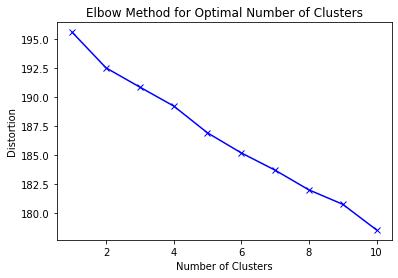

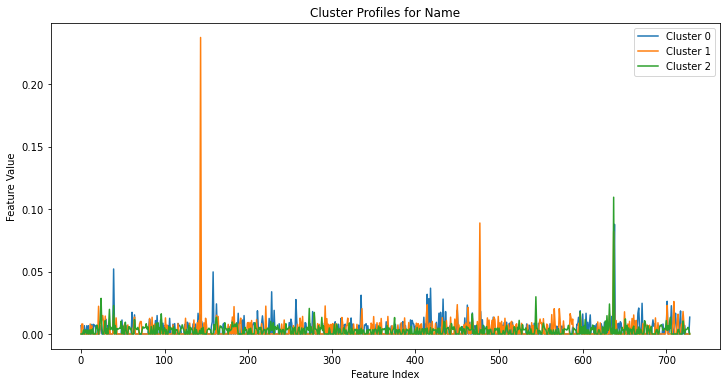

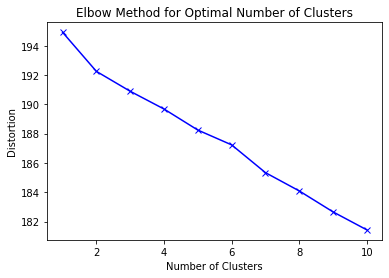

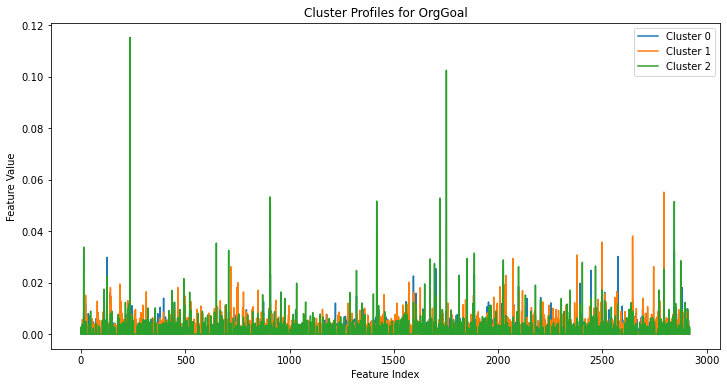

In [51]:

def compute_cluster_profiles(tfidf_matrix, column_name):
    # Step 3: Determine the number of clusters (k) using the elbow method
    distortions = []
    K = range(1, min(tfidf_matrix.shape[0], 11))  # Limiting the maximum number of clusters to 10 for visualization
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(tfidf_matrix)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve to find the optimal number of clusters
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

    # Based on the elbow curve, choose a reasonable number of clusters (k)
    # You can manually set k or use an algorithmic approach to determine it

    # Step 4: Instantiate the K-means object with the chosen number of clusters
    k = 3  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=k)

    # Step 5: Fit the model to the data
    kmeans.fit(tfidf_matrix)

    # Step 6: Visualize cluster profiles (cluster centroids)
    plt.figure(figsize=(12, 6))
    for i, centroid in enumerate(kmeans.cluster_centers_):
        plt.plot(centroid, label=f'Cluster {i}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.title(f'Cluster Profiles for {column_name}')
    plt.legend()
    plt.show()

# For the 'Name' column
compute_cluster_profiles(name_tfidf_df.values, 'Name')

# For the 'OrgGoal' column
compute_cluster_profiles(orgGoal_tfidf_df.values, 'OrgGoal')



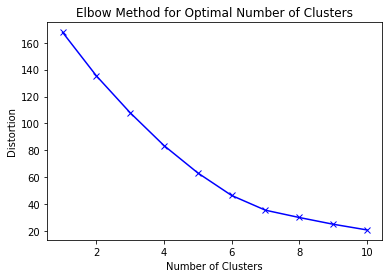

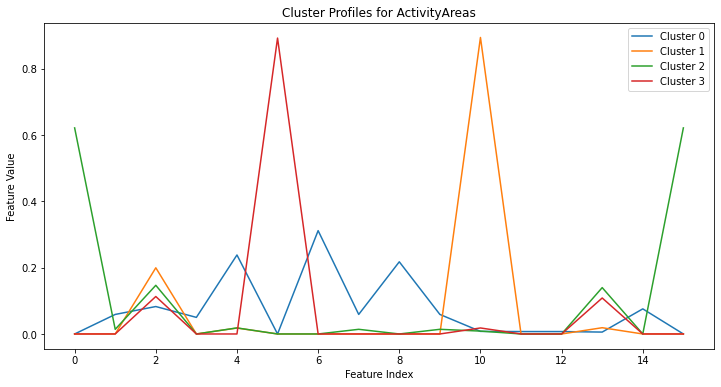

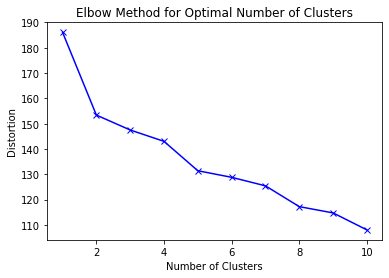

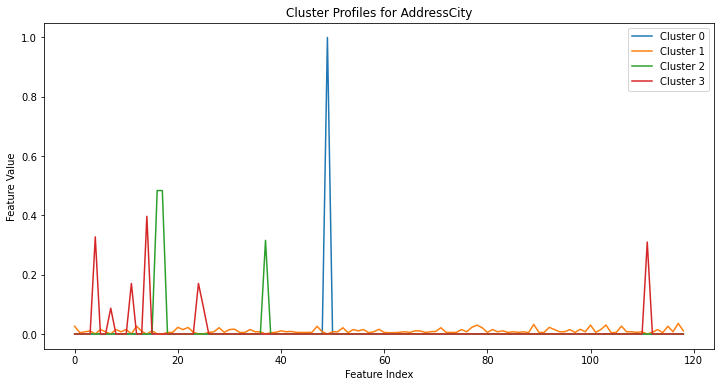

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a function to compute cluster profiles
def compute_cluster_profiles(tfidf_matrix, column_name):
    # Step 3: Determine the number of clusters (k) using the elbow method
    distortions = []
    K = range(1, min(tfidf_matrix.shape[0], 11)) # Limiting the maximum number of clusters to 10 for visualization
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(tfidf_matrix)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve to find the optimal number of clusters
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

    # Based on the elbow curve, choose a reasonable number of clusters (k)
    # You can manually set k or use an algorithmic approach to determine it
    # In this example, we'll choose k based on visual inspection of the elbow plot

    # Step 4: Instantiate the K-means object with the chosen number of clusters
    # Update k based on the elbow plot
    k = 4  # Adjust the number of clusters based on the elbow plot
    kmeans = KMeans(n_clusters=k)

    # Step 5: Fit the model to the data
    kmeans.fit(tfidf_matrix)

    # Step 6: Visualize cluster profiles (cluster centroids)
    plt.figure(figsize=(12, 6))
    for i, centroid in enumerate(kmeans.cluster_centers_):
        plt.plot(centroid, label=f'Cluster {i}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.title(f'Cluster Profiles for {column_name}')
    plt.legend()
    plt.show()

# For the 'ActivityAreas' column
compute_cluster_profiles(activityAreas_tfidf_matrix.toarray(), 'ActivityAreas')

# For the 'AddressCity' column
compute_cluster_profiles(addressCity_tfidf_matrix.toarray(), 'AddressCity')



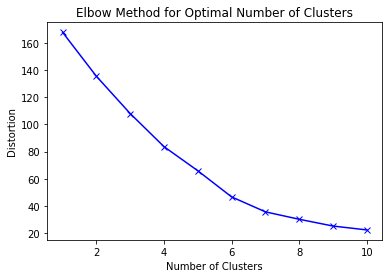

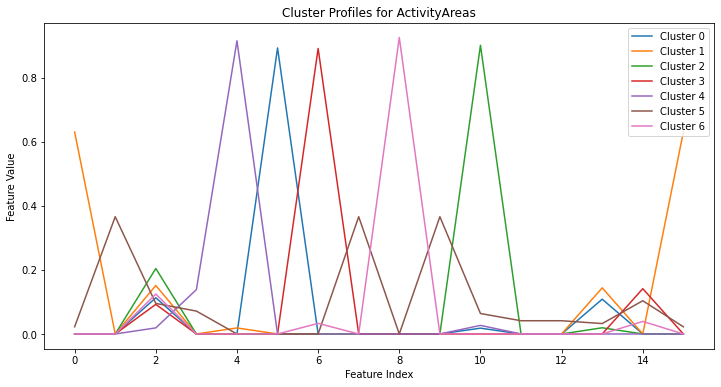

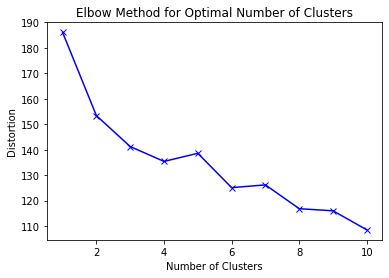

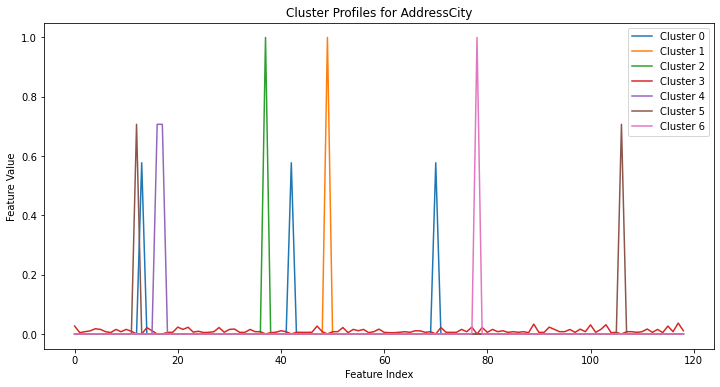

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a function to compute cluster profiles
def compute_cluster_profiles(tfidf_matrix, column_name):
    # Step 3: Determine the number of clusters (k) using the elbow method
    distortions = []
    K = range(1, min(tfidf_matrix.shape[0], 11)) # Limiting the maximum number of clusters to 10 for visualization
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(tfidf_matrix)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve to find the optimal number of clusters
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

    # Based on the elbow curve, choose a reasonable number of clusters (k)
    # You can manually set k or use an algorithmic approach to determine it
    # In this example, we'll choose k based on visual inspection of the elbow plot

    # Step 4: Instantiate the K-means object with the chosen number of clusters
    # Update k based on the elbow plot
    k = 7  # Set the number of clusters to 8 based on visual inspection
    kmeans = KMeans(n_clusters=k)

    # Step 5: Fit the model to the data
    kmeans.fit(tfidf_matrix)

    # Step 6: Visualize cluster profiles (cluster centroids)
    plt.figure(figsize=(12, 6))
    for i, centroid in enumerate(kmeans.cluster_centers_):
        plt.plot(centroid, label=f'Cluster {i}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.title(f'Cluster Profiles for {column_name}')
    plt.legend()
    plt.show()

# For the 'ActivityAreas' column
compute_cluster_profiles(activityAreas_tfidf_matrix.toarray(), 'ActivityAreas')

# For the 'AddressCity' column
compute_cluster_profiles(addressCity_tfidf_matrix.toarray(), 'AddressCity')


In [54]:
from sklearn.cluster import DBSCAN

# Assuming you have TF-IDF matrices for 'activityAreas' and 'addressCity'
# and you've already computed them

# Set parameters for DBSCAN
eps = 0.3
min_samples = 10

# Compute DBSCAN for 'activityAreas'
db_activityAreas = DBSCAN(eps=eps, min_samples=min_samples).fit(activityAreas_tfidf_matrix.toarray())
activityAreas_cluster_assignments = db_activityAreas.labels_

# Compute DBSCAN for 'addressCity'
db_addressCity = DBSCAN(eps=eps, min_samples=min_samples).fit(addressCity_tfidf_matrix.toarray())
addressCity_cluster_assignments = db_addressCity.labels_

# Now you can use these cluster assignments for plotting or further analysis


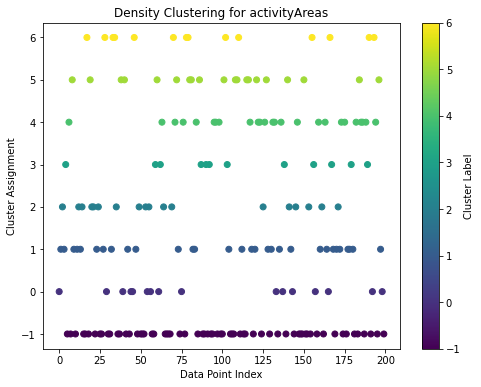

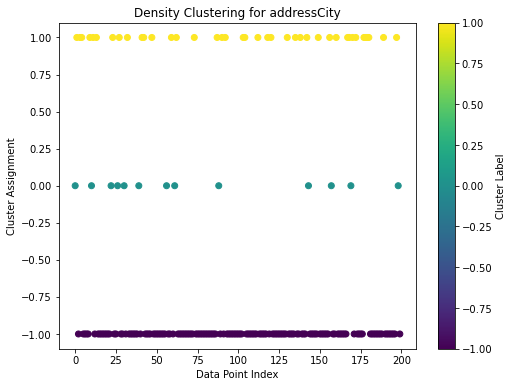

In [55]:
import matplotlib.pyplot as plt

# Plotting for 'activityAreas'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(activityAreas_cluster_assignments)), activityAreas_cluster_assignments, c=activityAreas_cluster_assignments, cmap='viridis')
plt.title('Density Clustering for activityAreas')
plt.xlabel('Data Point Index')
plt.ylabel('Cluster Assignment')
plt.colorbar(label='Cluster Label')
plt.show()

# Plotting for 'addressCity'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(addressCity_cluster_assignments)), addressCity_cluster_assignments, c=addressCity_cluster_assignments, cmap='viridis')
plt.title('Density Clustering for addressCity')
plt.xlabel('Data Point Index')
plt.ylabel('Cluster Assignment')
plt.colorbar(label='Cluster Label')
plt.show()


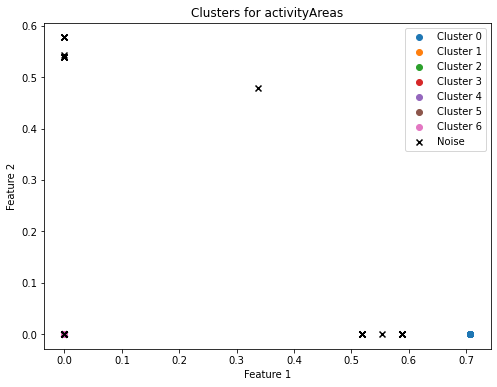

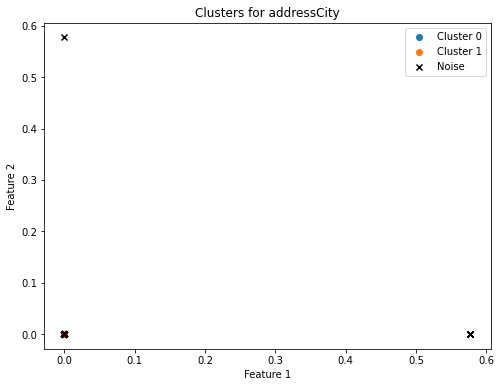

In [56]:
import matplotlib.pyplot as plt

# Define a function to visualize clusters for each column
def visualize_clusters(column_name, X, cluster_assignments):
    # Count the unique cluster labels, excluding noise points (-1)
    num_clusters = len(set(cluster_assignments)) - (1 if -1 in cluster_assignments else 0)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    for i in range(num_clusters):
        # Plot data points belonging to the current cluster
        plt.scatter(X[cluster_assignments == i, 0], X[cluster_assignments == i, 1], label=f'Cluster {i}')
    
    # Plot noise points
    if -1 in cluster_assignments:
        plt.scatter(X[cluster_assignments == -1, 0], X[cluster_assignments == -1, 1], color='black', marker='x', label='Noise')

    plt.title(f'Clusters for {column_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Visualize clusters for 'activityAreas'
visualize_clusters('activityAreas', activityAreas_tfidf_matrix.toarray(), activityAreas_cluster_assignments)

# Visualize clusters for 'addressCity'
visualize_clusters('addressCity', addressCity_tfidf_matrix.toarray(), addressCity_cluster_assignments)



In [57]:
#Content-Based Filtering
# Assuming name_tfidf_df and orgGoal_tfidf_df are already defined as shown in your code
# Concatenate TF-IDF DataFrames horizontally to create a comprehensive feature set for each organization
features_df = pd.concat([name_tfidf_df, orgGoal_tfidf_df], axis=1)


In [58]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Define stopwords list
    stop_words = set(stopwords.words('english'))
    
    # Initialize a stemmer
    stemmer = PorterStemmer()

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words and stem each word
    processed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Join the processed tokens back into a string
    processed_text = ' '.join(processed_tokens)

    return processed_text

[nltk_data] Downloading package punkt to /Users/noam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/noam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Assuming orgGoal_processed column exists with the preprocessed text
tfidf_vectorizer = TfidfVectorizer()
orgGoal_tfidf_matrix = tfidf_vectorizer.fit_transform(df['orgGoal'])

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_organizations_by_goal(input_goal, orgGoal_tfidf_matrix=orgGoal_tfidf_matrix, tfidf_vectorizer=tfidf_vectorizer, df=df):
    # Preprocess the input goal the same way 'orgGoal_processed' was preprocessed
    input_goal_processed = preprocess_text(input_goal)  # Implement this function based on your preprocessing steps
    
    # Transform the input goal into TF-IDF vector
    input_goal_vector = tfidf_vectorizer.transform([input_goal_processed])
    
    # Calculate cosine similarity between input goal and all organizations' goals
    cosine_similarities = cosine_similarity(input_goal_vector, orgGoal_tfidf_matrix)
    
    # Get similarity scores for all organizations and rank them
    similarity_scores = list(enumerate(cosine_similarities[0]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Extract the top N most similar organizations
    top_similar_indices = [i[0] for i in similarity_scores[:10]]  # Adjust the number as needed
    
    # Return the names of the top N most similar organizations based on the goal
    return df.iloc[top_similar_indices]['Name']


In [61]:
# Sample input goal
sample_goal = "סרטן"

# Get recommendations based on the sample goal
recommendations = recommend_organizations_by_goal(sample_goal)
print("Recommended Organizations:")
print(recommendations)

Recommended Organizations:
580430767                   " בצוותא " חונכים דרך להצלחה (ע"ר)
589105964                                        " נוה עציון "
580236214        ""אורח חיים" באר שבע ע"ש רבי חיים בן עטר זצ"ל
580448942    "'קשר" - התחזקות בין הקהילות דוברי צרפתית - יר...
580244747                       "א-קפלה - אנסמבל קולי ירושלים"
580008027    "א.ב.- חדשות השומרונים" -דו שבועון,העתון השומר...
580658029                "אבות ובנים" שכונת חבצלת רחובות (ע"ר)
580101475    "אביב" אגודת בוגרים וידידים של כפר הנוער בן שמ...
580029924               "אבני זכרון" עמותה בקבוץ הגושרים (ע"ר)
580663045    "אבני ציון" שימור שיחזור והצלה מהרס של בתים עת...
Name: Name, dtype: object


In [62]:
#GUI
import tkinter as tk
from tkinter import scrolledtext
from tkinter import messagebox
from sklearn.metrics.pairwise import cosine_similarity

# Ensure you have these defined in your script
# tfidf_vectorizer, orgGoal_tfidf_matrix, and preprocess_text function

def recommend_organizations_by_goal(input_goal):
    # Preprocess the input goal
    processed_goal = preprocess_text(input_goal)
    # Vectorize the processed input goal using the same TF-IDF vectorizer
    goal_vector = tfidf_vectorizer.transform([processed_goal])
    # Calculate cosine similarity between the input goal vector and all organization goal vectors
    cosine_similarities = cosine_similarity(goal_vector, orgGoal_tfidf_matrix)
    # Get the similarity scores for all organizations
    similarity_scores = list(enumerate(cosine_similarities[0]))
    # Sort the organizations based on similarity scores
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    # Get the top 5 most similar organization indices
    top_indices = [i[0] for i in sorted_scores[:5]]
    # Fetch the organization names corresponding to the top indices
    top_orgs = df.iloc[top_indices]['Name']
    return top_orgs

def get_recommendations():
    input_goal = goal_entry.get()
    try:
        recommendations = recommend_organizations_by_goal(input_goal)
        recommendations_text_area.delete(1.0, tk.END)  # Clear previous recommendations
        for org_name in recommendations:
            recommendations_text_area.insert(tk.INSERT, org_name + '\n')
    except Exception as e:
        messagebox.showerror("Error", "Failed to get recommendations.\n" + str(e))

# GUI setup follows from the previous example
root = tk.Tk()
root.title("Recommendation System")

label = tk.Label(root, text="Enter a goal:")
label.pack(pady=10)

goal_entry = tk.Entry(root)
goal_entry.pack(pady=10)

recommend_button = tk.Button(root, text="Get Recommendations", command=get_recommendations)
recommend_button.pack(pady=10)

recommendations_text_area = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=40, height=10)
recommendations_text_area.pack(pady=10)

root.mainloop()

2024-03-27 22:39:03.766 python[78342:1197854] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


In [63]:
# Create more nuanced simulated data
data_conditions = {
    'Selective User': {'true_positives': 20, 'false_positives': 5, 'false_negatives': 80},
    'Pleased User': {'true_positives': 70, 'false_positives': 30, 'false_negatives': 10},
    'Critical User': {'true_positives': 10, 'false_positives': 2, 'false_negatives': 90},
    'Random Feedback': {'true_positives': 50, 'false_positives': 50, 'false_negatives': 50}
}

# Convert conditions into DataFrame format
feedback_data = []
for user_type, counts in data_conditions.items():
    tp = counts['true_positives']
    fp = counts['false_positives']
    fn = counts['false_negatives']
    tn = 100 - (tp + fp + fn)  # Assuming 100 total recommendations for simplicity
    feedback_data.append([user_type, tp, fp, fn, tn])

feedback_df = pd.DataFrame(feedback_data, columns=['User Type', 'True Positives', 'False Positives', 'False Negatives', 'True Negatives'])

# Calculate Precision, Recall, F1 for each condition
feedback_df['Precision'] = feedback_df.apply(lambda x: x['True Positives'] / (x['True Positives'] + x['False Positives']) if (x['True Positives'] + x['False Positives']) else 0, axis=1)
feedback_df['Recall'] = feedback_df.apply(lambda x: x['True Positives'] / (x['True Positives'] + x['False Negatives']) if (x['True Positives'] + x['False Negatives']) else 0, axis=1)
feedback_df['F1 Score'] = 2 * (feedback_df['Precision'] * feedback_df['Recall']) / (feedback_df['Precision'] + feedback_df['Recall'])

feedback_df



,User Type,True Positives,False Positives,False Negatives,True Negatives,Precision,Recall,F1 Score
0,Selective User,20,5,80,-5,0.800000,0.200,0.320000
1,Pleased User,70,30,10,-10,0.700000,0.875,0.777778
2,Critical User,10,2,90,-2,0.833333,0.100,0.178571
3,Random Feedback,50,50,50,-50,0.500000,0.500,0.500000


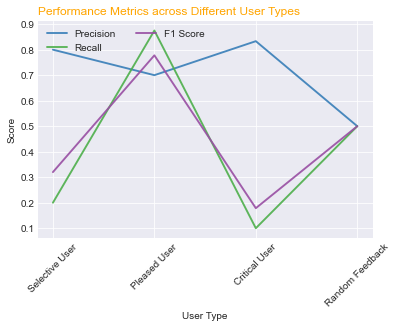

In [64]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('Set1')

# Plot Precision, Recall, and F1 Score for each user type
num=0
for column in feedback_df.columns[5:]:
    num+=1
    plt.plot(feedback_df['User Type'], feedback_df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Performance Metrics across Different User Types", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("User Type")
plt.ylabel("Score")

plt.xticks(rotation=45)
plt.show()



In [65]:
# Define the path to your Python script
script_path = '/Users/noam/Desktop/לימודים/שנה ד/נושאים מצקדמים בלמידת מכונה/final/project 27.03 final (1).ipynb'

# Define the output text file path
output_path = '/Users/noam/Desktop/לימודים/שנה ד/נושאים מצקדמים בלמידת מכונה/final/text.txt'

# Read the content of your Python script
with open(script_path, 'r') as script_file:
    script_content = script_file.read()

# Write the content to a text file
with open(output_path, 'w') as text_file:
    text_file.write(script_content)

print(f"The content of {script_path} has been written to {output_path}")


The content of /Users/noam/Desktop/לימודים/שנה ד/נושאים מצקדמים בלמידת מכונה/final/project 27.03 final (1).ipynb has been written to /Users/noam/Desktop/לימודים/שנה ד/נושאים מצקדמים בלמידת מכונה/final/text.txt


In [66]:
# Read the content of your Python script
with open(script_path, 'r') as script_file:
    script_content = script_file.read()

# Print the script content
print(script_content)


{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import requests\n",
    "import json\n",
    "import pandas as pd \n",
    "from sklearn.preprocessing import OneHotEncoder"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [],
   "source": [
    "base_url = 'https://www.guidestar.org.il/services/apexrest/api'\n",
    "login_info = {\n",
    "    'username': 'Avia.2.4.6@gmail.com',\n",
    "    'password': 'Acavish217!'\n",
    "}\n",
    "\n",
    "res = requests.post(base_url + '/login', json = login_info)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [],
   "source": [
    "session_id = res.json()['sessionId']"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "'00D24000000p4lu!ARsAQKrEPUh0r2gilhqENc2lYQzNcxzf1AFYOGgk